In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-dataset/Medicaldataset.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
data= ('/kaggle/input/heart-attack-dataset/Medicaldataset.csv')

In [4]:
df = pd.read_csv('/kaggle/input/heart-attack-dataset/Medicaldataset.csv')

In [5]:
df.shape

(1319, 9)

In [6]:
df.head(5)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [8]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [9]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.193328,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.638173,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [10]:
result_dict = {'positive': 1,
               'negative': 0
              }

df['Result'] = df['Result'].map(result_dict)

In [11]:
df.head(10)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,0
1,20,1,94,98,46,296.0,6.75,1.060,1
2,56,1,64,160,77,270.0,1.99,0.003,0
3,66,1,70,120,55,270.0,13.87,0.122,1
4,54,1,64,112,65,300.0,1.08,0.003,0
5,52,0,61,112,58,87.0,1.83,0.004,0
6,38,0,40,179,68,102.0,0.71,0.003,0
7,61,1,60,214,82,87.0,300.00,2.370,1
8,49,0,60,154,81,135.0,2.35,0.004,0
9,65,1,61,160,95,100.0,2.84,0.011,0


<Axes: >

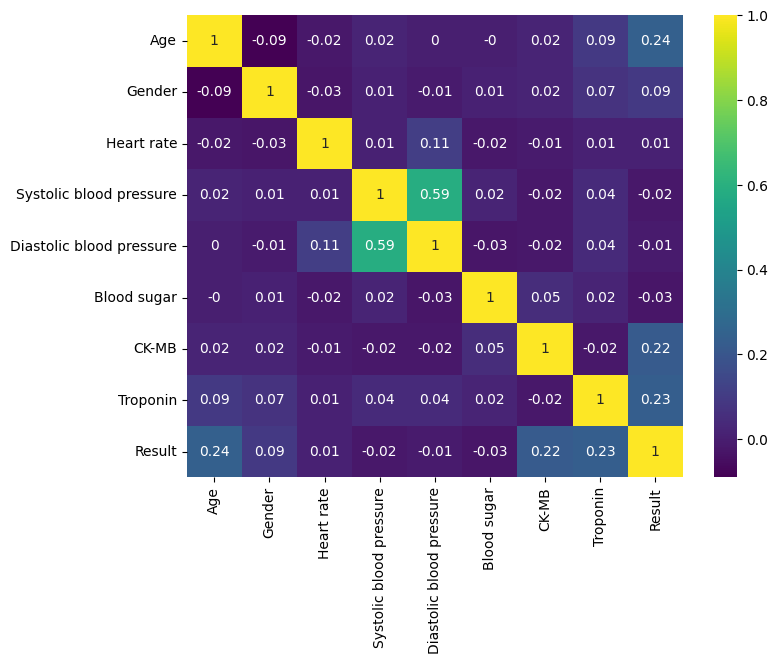

In [12]:
plt.figure(figsize=(8, 6))
heatmap_data = df.corr().round(2)  
sns.heatmap(heatmap_data, annot=True,cmap='viridis')

In [13]:
# veri ön işleme adımı

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# dataseti kopyalama
df_preprocessed = df.copy()

# kategorik değişkenleri sayar
label_encoder = LabelEncoder()
df_preprocessed['Result'] = label_encoder.fit_transform(df_preprocessed['Result'])

# verileri eğitim ve test kümelerine ayırın
X = df_preprocessed.drop('Result', axis=1)
y = df_preprocessed['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sayısal nitelikleri normalleştirin veya standartlaştırın, normalizasyon
scaler = StandardScaler()
numerical_cols = ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

X_train.head(10)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
598,-1.035869,0.719712,0.101709,1.012203,1.322291,-0.651508,-0.213444,-0.310036
1213,1.463736,0.719712,1.175163,-0.617725,-0.234964,-0.730903,-0.277728,-0.284726
209,0.287451,0.719712,-0.214012,-3.295463,-0.588885,-0.545649,-0.308747,0.072336
538,-0.300691,-1.389444,0.227998,0.119624,0.543664,0.446783,-0.286466,-0.294669
140,-0.815316,-1.389444,0.017517,-1.549112,-1.792218,-0.863227,-0.277520,-0.310036
910,-0.815316,0.719712,-0.298205,-0.268454,-0.305748,-0.664740,-0.306022,-0.207890
1165,0.360969,0.719712,-0.298205,-1.704343,-0.872022,-0.466254,-0.312804,-0.303709
199,-0.815316,0.719712,-0.214012,1.051011,1.605428,-0.598578,-0.174748,-0.309132
312,0.287451,0.719712,-0.066676,1.283858,-0.164179,0.089508,-0.243402,-0.013540
1230,0.360969,0.719712,0.249046,1.671936,1.605428,0.129205,-0.229879,-0.261223


**Veriye bazı özellikler eklenerek modele katkı sağlanmıştır. Ekelenen özellikler;**

1. **VÜCUT KİTLE ENDEKSİ**
2. **BP_Category (Kan Basıncı Kategorisi)**

BP_Category, kişilerin sistolik kan basıncı (Systolic blood pressure) değerlerine göre kategorize edilmiştir. Kategoriler şu şekilde belirlenmiştir:

Normal: Kan basıncı 120'nin altı.
Elevated (Yükselmiş): Kan basıncı 120-129 arasında.
High Stage 1 (Yüksek Evre 1): Kan basıncı 130-139 arasında.
High Stage 2 (Yüksek Evre 2): Kan basıncı 140 ve üzerinde.   

In [14]:
weight = 70  # in kilograms
height = 1.7  # in meters
BMI = weight / (height ** 2)
X_train['BMI'] = BMI
X_test['BMI'] = BMI

# Creating a feature for Blood Pressure Category based on Systolic blood pressure
# Categories: Normal (<120), Elevated (120-129), High Stage 1 (130-139), High Stage 2 (>=140)
conditions = [
    (X_train['Systolic blood pressure'] < 120),
    (X_train['Systolic blood pressure'] >= 120) & (X_train['Systolic blood pressure'] <= 129),
    (X_train['Systolic blood pressure'] >= 130) & (X_train['Systolic blood pressure'] <= 139),
    (X_train['Systolic blood pressure'] >= 140)
]
categories = ['Normal', 'Elevated', 'High Stage 1', 'High Stage 2']
X_train['BP_Category'] = np.select(conditions, categories, default='Unknown')

conditions_test = [
    (X_test['Systolic blood pressure'] < 120),
    (X_test['Systolic blood pressure'] >= 120) & (X_test['Systolic blood pressure'] <= 129),
    (X_test['Systolic blood pressure'] >= 130) & (X_test['Systolic blood pressure'] <= 139),
    (X_test['Systolic blood pressure'] >= 140)
]
X_test['BP_Category'] = np.select(conditions_test, categories, default='Unknown')

# Encoding the newly created categorical variable 'BP_Category'
bp_category_encoder = LabelEncoder()
X_train['BP_Category'] = bp_category_encoder.fit_transform(X_train['BP_Category'])
X_test['BP_Category'] = bp_category_encoder.transform(X_test['BP_Category'])

# Display the head of the modified DataFrame to verify the new features
X_train.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,BMI,BP_Category
598,-1.035869,0.719712,0.101709,1.012203,1.322291,-0.651508,-0.213444,-0.310036,24.221453,0
1213,1.463736,0.719712,1.175163,-0.617725,-0.234964,-0.730903,-0.277728,-0.284726,24.221453,0
209,0.287451,0.719712,-0.214012,-3.295463,-0.588885,-0.545649,-0.308747,0.072336,24.221453,0
538,-0.300691,-1.389444,0.227998,0.119624,0.543664,0.446783,-0.286466,-0.294669,24.221453,0
140,-0.815316,-1.389444,0.017517,-1.549112,-1.792218,-0.863227,-0.277520,-0.310036,24.221453,0


In [15]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

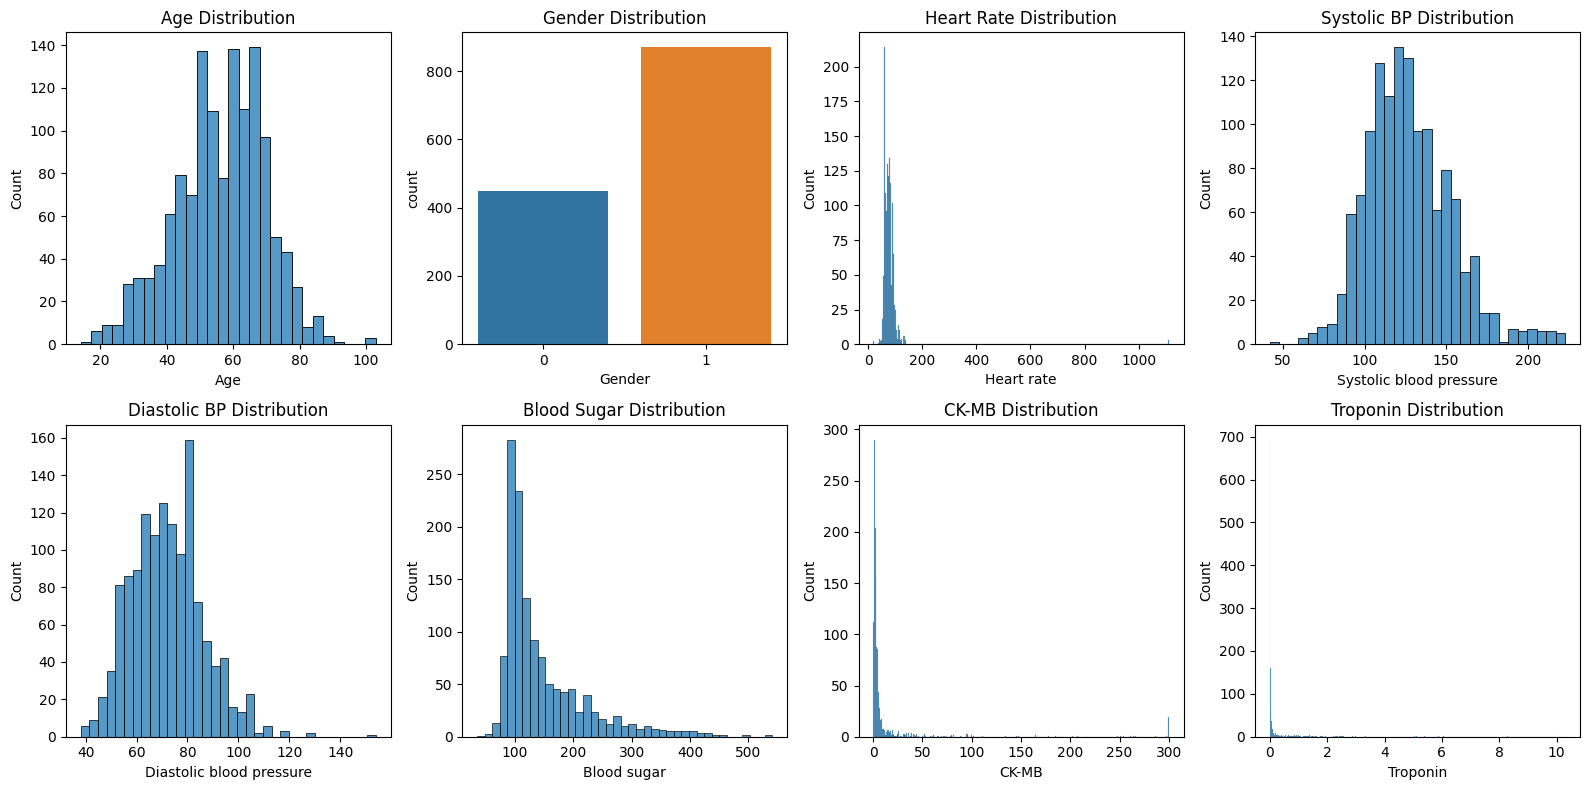

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grafik alanını oluşturma
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Histogramlar
sns.histplot(df['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['Diastolic blood pressure'], ax=axes[1, 0])
axes[1, 0].set_title('Diastolic BP Distribution')

sns.histplot(df['Blood sugar'], ax=axes[1, 1])
axes[1, 1].set_title('Blood Sugar Distribution')

sns.histplot(df['CK-MB'], ax=axes[1, 2])
axes[1, 2].set_title('CK-MB Distribution')

sns.histplot(df['Troponin'], ax=axes[1, 3])
axes[1, 3].set_title('Troponin Distribution')

sns.histplot(df['Heart rate'], ax=axes[0, 2])
axes[0, 2].set_title('Heart Rate Distribution')

sns.histplot(df['Systolic blood pressure'], ax=axes[0, 3])
axes[0, 3].set_title('Systolic BP Distribution')

# Cinsiyet dağılımı için sütun grafiği
sns.countplot(x='Gender', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution')

# Görüntü düzeni ve gösterme
plt.tight_layout()
plt.show()


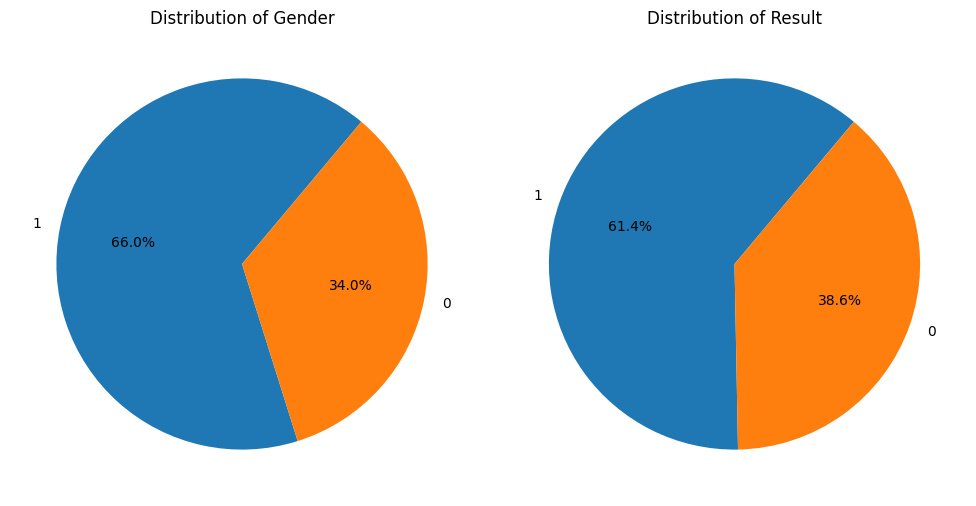

In [17]:
import matplotlib.pyplot as plt

# Count the occurrences of each category in 'Gender' and 'Result'
gender_counts = df['Gender'].value_counts()
result_counts = df['Result'].value_counts()

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5 ))

# Pie chart for Gender
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=50)
axes[0].set_title('Distribution of Gender')

# Pie chart for Result
axes[1].pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=50)
axes[1].set_title('Distribution of Result')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

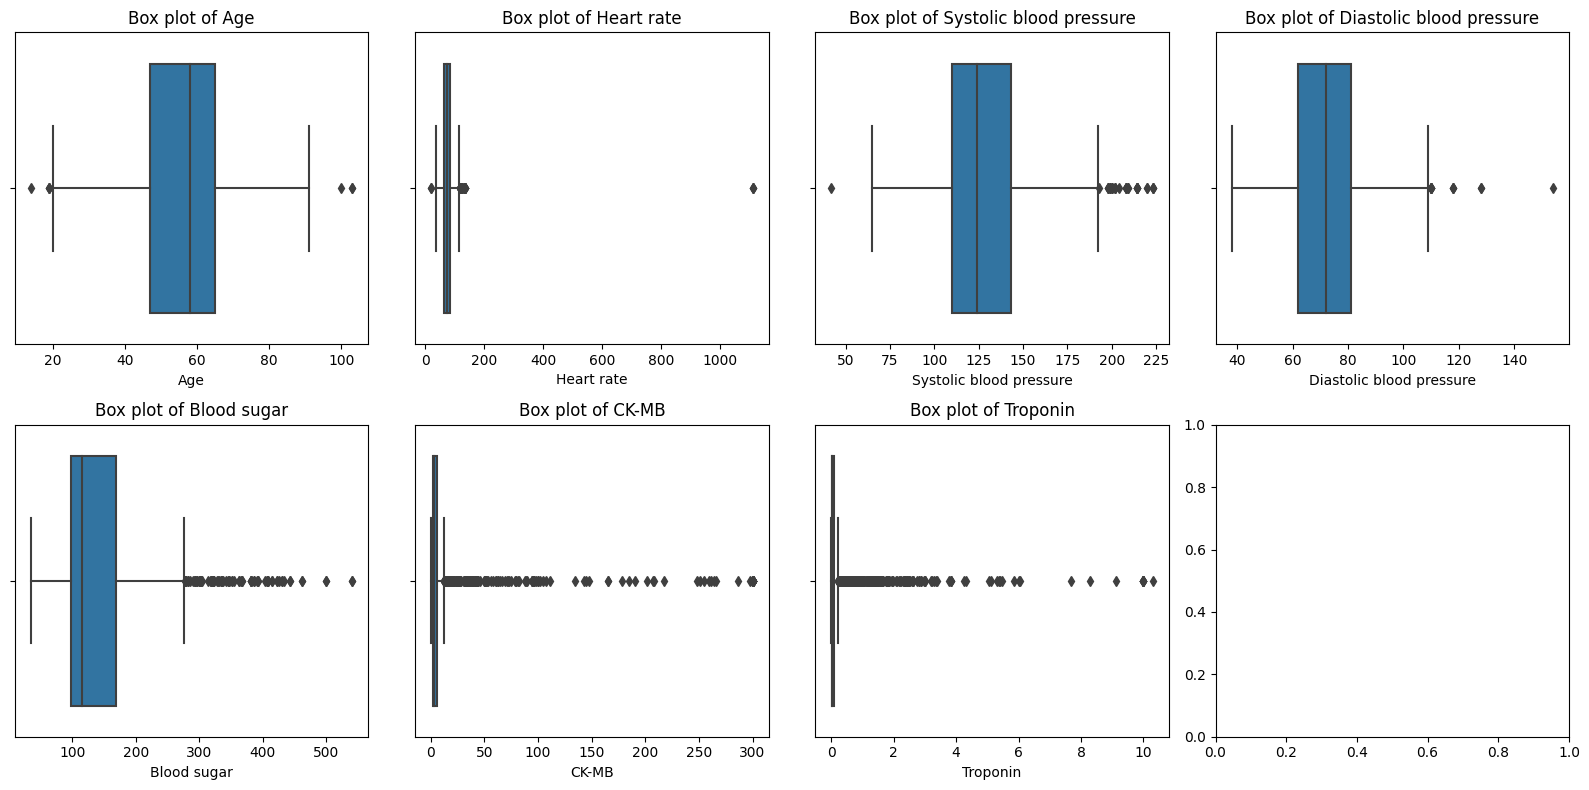

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

axes = axes.flatten()


columns = ['Age', 'Heart rate', 'Systolic blood pressure', 
           'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']


for i, column in enumerate(columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

In [19]:
x= df.drop(columns=['Result'])  
y = df['Result'] 

test_size= 0.2 için random forst model skoru 0.99

tesr_size=0.5 için random forst score 0.98


In [20]:
#eğitim ve test veri setine bölme, test veri setini % lik olarak tanımlar.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

SVM, RANDOM FOREST VE KARAR AĞACI MODELLERİNİN DOĞRULUĞU

In [22]:
# 📌 Gerekli Kütüphaneleri İçeri Aktarma
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# 📌 1️⃣ Veri Setini Okuma (Eğer CSV Dosyan Varsa)
# data = pd.read_csv('kalp_krizi_verileri.csv')

# 📌 2️⃣ Özellikler (X) ve Hedef Değişken (y) Belirleme
X = df.drop(columns=['Result'])  # 'Target' → Kalp Krizi Riski (1: Var, 0: Yok)
y = df['Result']

# 📌 3️⃣ Eğitim ve Test Setlerine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 4️⃣ Veri Standardizasyonu (SVM İçin Gerekli)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📌 5️⃣ MODELLERİN EĞİTİLMESİ VE TAHMİN SONUÇLARININ ALINMASI

# SVM Modeli
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Random Forest Modeli
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Karar Ağacı Modeli
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# 📌 6️⃣ SONUÇLARIN YAZDIRILMASI
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")


SVM Accuracy: 0.79
Random Forest Accuracy: 0.98
Decision Tree Accuracy: 0.98


SVM SKORUNUN YÜKSELTİLMESİ İÇİN ÖZELLİK SEÇİMİ

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Farklı kernel türlerini deneme
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm_model = SVC(kernel=kernel, C=1.0, gamma='scale')
    svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_test_scaled)
    print(f"SVM (Kernel={kernel}) Accuracy: {accuracy_score(y_test, y_pred):.4f}")


SVM (Kernel=linear) Accuracy: 0.7917
SVM (Kernel=poly) Accuracy: 0.6780
SVM (Kernel=rbf) Accuracy: 0.7311
SVM (Kernel=sigmoid) Accuracy: 0.6970


**SVM İÇİN OPTİMİZASYON İLE DOĞRULUĞUN ARTTIRILMASI**

In [25]:
from sklearn.model_selection import GridSearchCV # ızgara oluşturma

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid.best_params_}")
best_svm = grid.best_estimator_

y_pred = best_svm.predict(X_test_scaled)
print(f"Optimized SVM Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Optimized SVM Accuracy: 0.8447


KNN İÇİN DOĞRULUK DEĞERİ (SKORE)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=15)  # K=15 ile KNN modeli
knn_model.fit(X_train, y_train)  # Modeli eğitimi
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3)

In [28]:
y_pred_knn = knn_model.predict(X_test)  # Test verileriyle tahmin yapmak


In [29]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)  # Doğruluk skoru
print(f"KNN Model Accuracy: {knn_accuracy:.2f}")  # Sonucu yazdır

KNN Model Accuracy: 0.73


KNN İÇİN ÖZELLİK SEÇİMİ İLE MODELİN DOĞRULUĞUNUN ARTMASI


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
best_k = 1
best_accuracy = 0

for k in range(1, 41):  # K=1'den 40'ye kadar dene
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k

print(f"En iyi K değeri: {best_k}, Doğruluk: {best_accuracy:.2f}")


En iyi K değeri: 27, Doğruluk: 0.70


KNN İÇİN GÖRSELLEŞİTRME

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


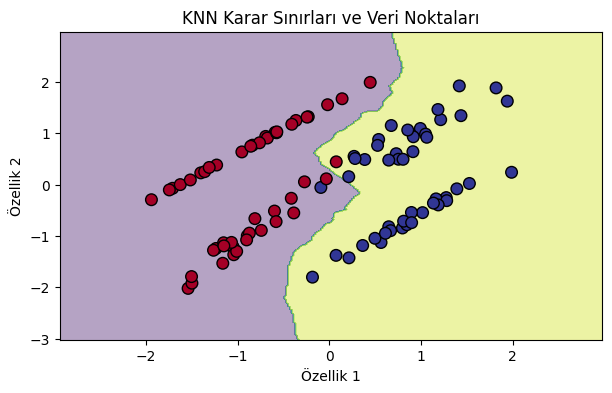

In [33]:
from sklearn.datasets import make_classification

# Örnek veri seti oluştur (2 özellikli sınıflandırma veri seti)
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, 
                            n_informative=2, n_redundant=0, n_repeated=0, random_state=42)

# Özellikleri ölçeklendir
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KNN modelini oluştur
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)

# Karar sınırlarını görselleştirecek meshgrid(ağ) oluştur
import numpy as np
h = .02  # Meshgrid adım boyutu
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Karar sınırını tahmin et
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Grafiği çiz
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 4))

# Karar sınırını çizin
plt.contourf(xx, yy, Z, alpha=0.4)

# Eğitim verisini ve sınıf etiketlerini çizin
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', marker='o', s=70, cmap=plt.cm.RdYlBu)
plt.title('KNN Karar Sınırları ve Veri Noktaları')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()


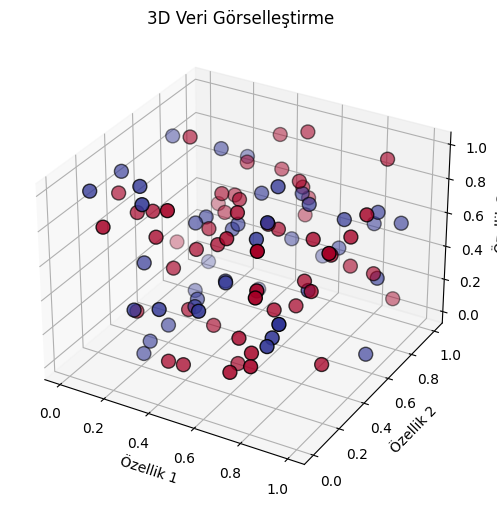

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Örnek veri seti (3 özellikli, 100 örnekli)
X = np.random.rand(100, 3)  # 100 örnek, 3 özellik
y = np.random.randint(0, 2, size=100)  # 0 ve 1 arasında rastgele etiketler

# 3D plot oluştur
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Özelliklerin her birini X, Y, Z eksenlerine yerleştir
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', s=100)

# Eksen etiketleri
ax.set_xlabel('Özellik 1')
ax.set_ylabel('Özellik 2')
ax.set_zlabel('Özellik 3')

# Başlık
ax.set_title('3D Veri Görselleştirme')

# Grafiği göster
plt.show()


**KNN N Değerini Bulma**

En iyi k değeri: 31


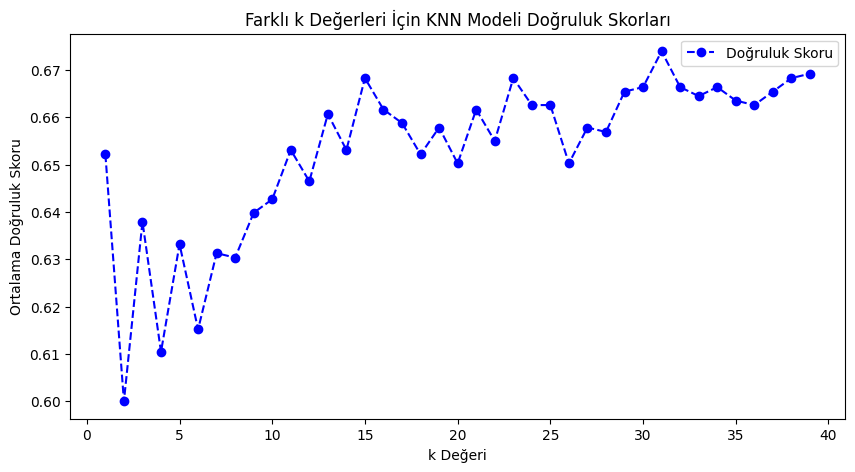

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# 📌 1️⃣ Veri Setini Yükle
df = pd.read_csv('/kaggle/input/heart-attack-dataset/Medicaldataset.csv')

# 📌 2️⃣ Bağımsız (X) ve Bağımlı (y) Değişkenleri Seç
X = df.drop(columns=["Result"])  # Hedef sütunu çıkar
y = df["Result"]  # Hedef değişken (kalp hastalığı sonucu)

# 📌 3️⃣ Veriyi Eğitim ve Test Setine Böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 4️⃣ Özellikleri Ölçeklendir (KNN, mesafe bazlı olduğu için önemli!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 📌 5️⃣ En İyi k Değerini Bulma
k_values = range(1, 40)  # 1 ile 30 arasında k değerlerini deneyeceğiz
cv_scores = []  # Her k için doğruluk skorlarını saklayacağız

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5 katlı çapraz doğrulama
    cv_scores.append(scores.mean())

# 📌 6️⃣ En İyi k Değerini Bul ve Grafiğini Çiz
best_k = k_values[np.argmax(cv_scores)]  # En yüksek doğruluk skoruna sahip k
print(f"En iyi k değeri: {best_k}")

plt.figure(figsize=(10, 5))
plt.plot(k_values, cv_scores, marker='o', linestyle='dashed', color='b', label="Doğruluk Skoru")
plt.xlabel("k Değeri")
plt.ylabel("Ortalama Doğruluk Skoru")
plt.title("Farklı k Değerleri İçin KNN Modeli Doğruluk Skorları")
plt.legend()
plt.show()


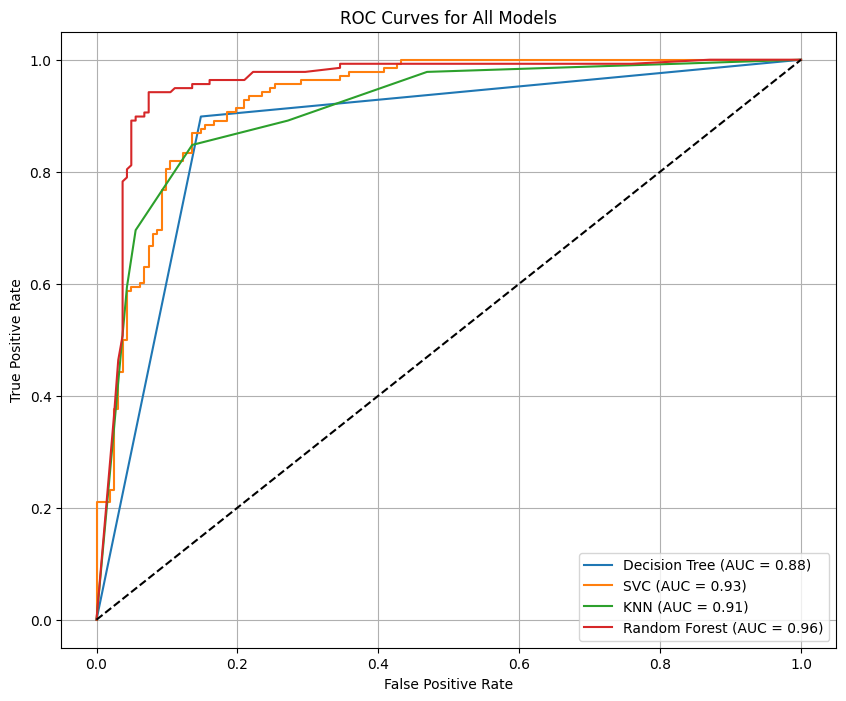

           Model  Accuracy  Precision    Recall   AUC-ROC
0  Decision Tree  0.873333   0.837838  0.898551  0.875201
1            SVC  0.863333   0.839161  0.869565  0.927939
2            KNN  0.856667   0.841727  0.847826  0.910561
3  Random Forest  0.933333   0.915493  0.942029  0.955471


In [36]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Örnek veri seti oluşturma (binary sınıflandırma)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           n_informative=2, n_redundant=10, random_state=42)

# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modeller ve isimleri
dt_clf = DecisionTreeClassifier()
svc = SVC(probability=True)  # probability=True olmalı ki predict_proba çalışsın
knn = KNeighborsClassifier()  # max_iter veya başka geçersiz parametre yok
rf = RandomForestClassifier(random_state=42)  # Random Forest eklendi

models = [dt_clf, svc, knn, rf]
model_names = ['Decision Tree', 'SVC', 'KNN', 'Random Forest']

# Sonuçları tutacak sözlük
scores = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'AUC-ROC': []}

plt.figure(figsize=(10, 8))

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    scores['Model'].append(name)
    scores['Accuracy'].append(accuracy_score(y_test, y_pred))
    scores['Precision'].append(precision_score(y_test, y_pred))
    scores['Recall'].append(recall_score(y_test, y_pred))
    scores['AUC-ROC'].append(roc_auc_score(y_test, y_proba))

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

scores_df = pd.DataFrame(scores)
print(scores_df)


In [37]:
# En iyi modeli bulma
best_model_idx = scores_df['AUC-ROC'].idxmax()
best_model_name = scores_df.loc[best_model_idx, 'Model']
best_model_auc = scores_df.loc[best_model_idx, 'AUC-ROC']

print(f"En iyi AUC-ROC skoruna sahip model: {best_model_name} ({best_model_auc:.4f})")


En iyi AUC-ROC skoruna sahip model: Random Forest (0.9555)



Decision Tree - Confusion Matrix:
[[138  24]
 [ 14 124]]


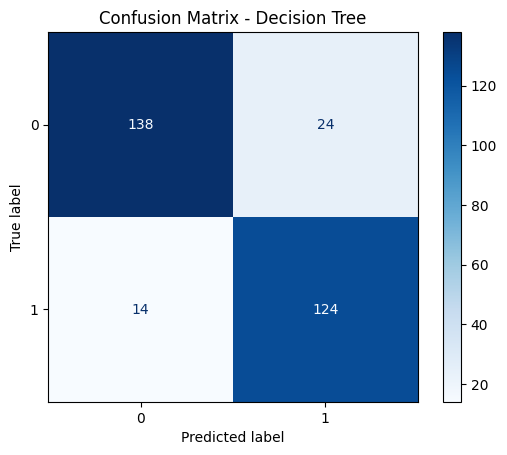


SVC - Confusion Matrix:
[[139  23]
 [ 18 120]]


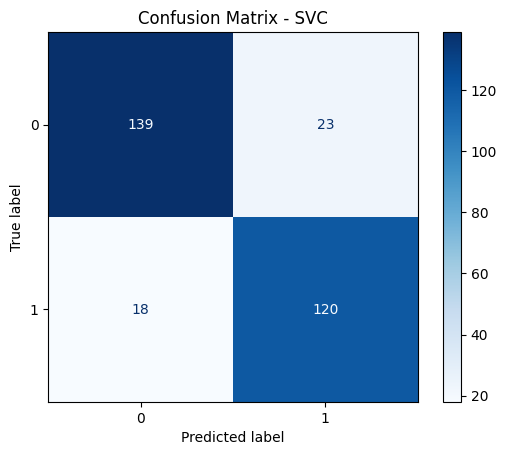


KNN - Confusion Matrix:
[[140  22]
 [ 21 117]]


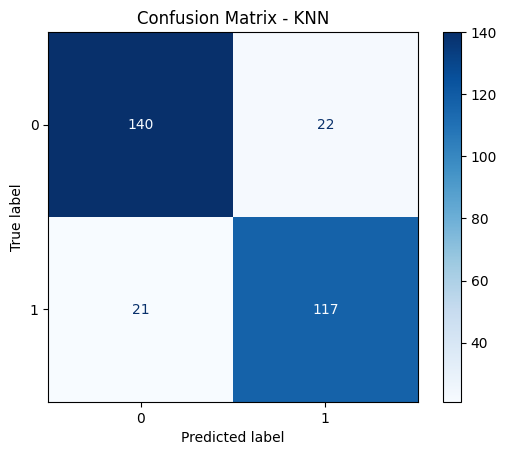


Random Forest - Confusion Matrix:
[[150  12]
 [  8 130]]


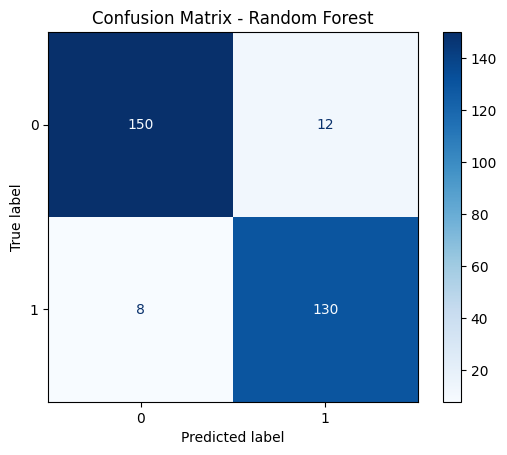

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Eğitilmiş modelleri yeniden listele

models = [dt_clf, svc, knn, rf]
model_names = ['Decision Tree', 'SVC', 'KNN', 'Random Forest']


# --- KARMAŞIKLIK MATRİSLERİNİN OLUŞTURULMASI VE GÖRSELLEŞTİRİLMESİ ---
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"\n{name} - Confusion Matrix:")
    print(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.grid(False)
    plt.show()
